# Library Imports

In [271]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

These libraries provide functionality for data manipulation (pandas), visualization (matplotlib and seaborn), model training and evaluation (sklearn), and handling imbalanced datasets (imblearn).

# Loading the Dataset

In [274]:
# Load the Dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)

The dataset is loaded from a UCI repository URL. The columns include an ID, a diagnosis (M for malignant and B for benign), and 30 feature measurements related to the breast cancer tumors.

# Basic Data Overview

In [277]:
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [278]:
data.tail() 

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [279]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

In [280]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [281]:
data.describe().T # Transpose to view in better format

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [282]:
print(f"Shape of dataset: {data.shape}")

Shape of dataset: (569, 32)


Displays the first and last few rows of the dataset, its structure, and summary statistics (mean, standard deviation, etc.) for each feature. The shape provides insights into the number of samples and features.

# Check for duplicate rows

In [285]:
# Check for duplicate rows
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


This block checks for duplicate entries in the dataset and calculates their percentage, which is essential to ensure data quality.

# Unique Value Counts

In [288]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


Displays the number of unique values in each column, which helps in understanding the variability of the data.

# Drop non-numeric columns

In [291]:
# Drop non-numeric columns
data.drop('ID', axis=1, inplace=True)

The ID column is removed as it doesn't provide any useful information for the classification task.

# Encode Labels

In [294]:
# Encode Labels: Encoding 'Diagnosis' column (1 for Malignant, 0 for Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

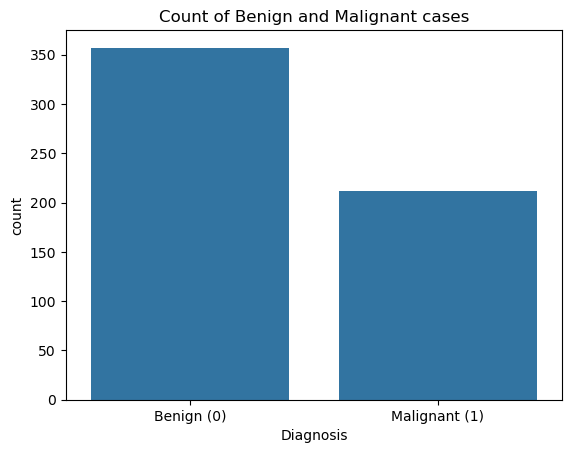

In [295]:
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.show()

The 'Diagnosis' column is encoded to numerical values (1 for malignant, 0 for benign), making it suitable for model training. The count plot visually represents the distribution of cases.

# Pie Chart for Distribution

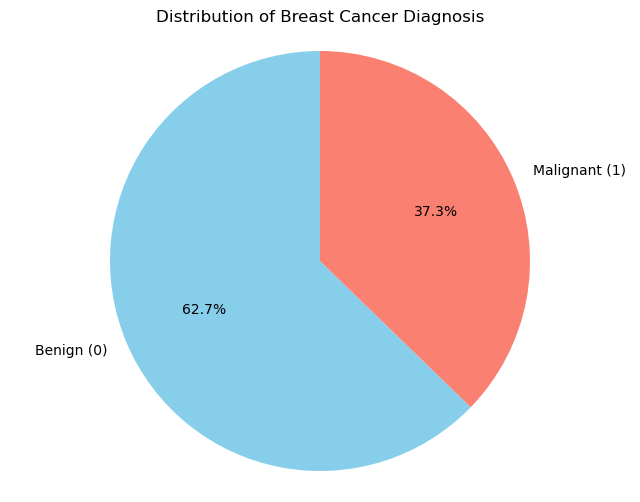

In [298]:
# Create a pie chart for the Distribution of Breast Cancer Diagnosis
diagnosis_counts = data['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.axis('equal')
plt.show()

This creates a pie chart to visualize the proportion of benign and malignant cases in the dataset.

# Checking for Missing Values

In [301]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64
No missing values found in the dataset.


This part checks for any missing values in the dataset and prints the count for each column, which is crucial for data integrity.

# Correlation Heatmap

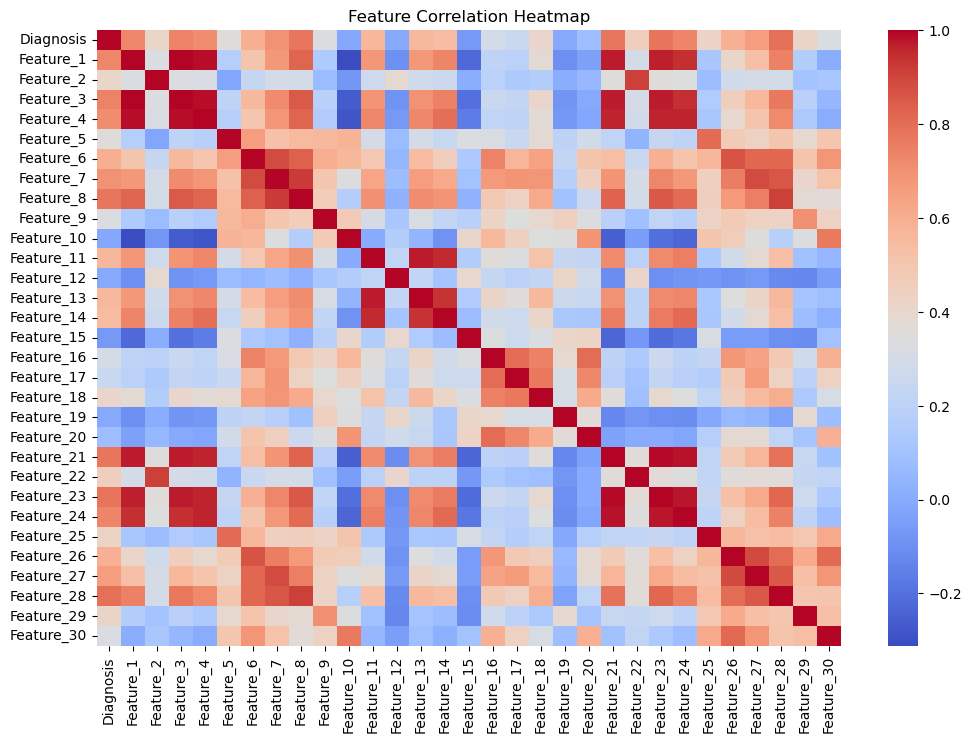

In [304]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The correlation heatmap visualizes relationships between features. Strong correlations can indicate redundancy or inform feature selection.

# Positive Correlation Scatter Plots

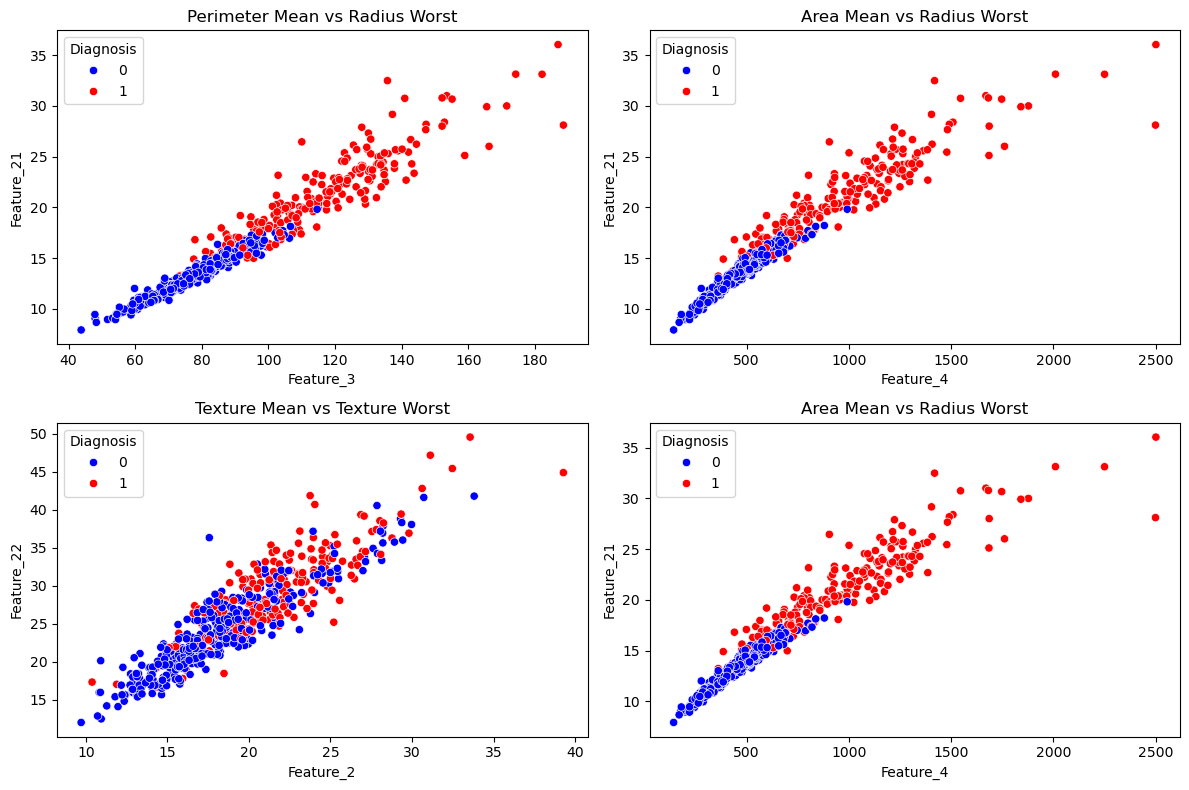

In [307]:
# Plotting positive correlated features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Feature_3'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Perimeter Mean vs Radius Worst')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Area Mean vs Radius Worst')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Feature_2'], y=data['Feature_22'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Texture Mean vs Texture Worst')

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Area Mean vs Radius Worst')

plt.tight_layout()
plt.show()

Scatter plots explore relationships between selected features and the target variable, revealing patterns that may help in diagnosis.

# Outlier Detection

In [310]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [311]:
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


Calculates the Interquartile Range (IQR) to identify outliers in the data, which can significantly affect model performance.

# Outlier Visualization

In [314]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()

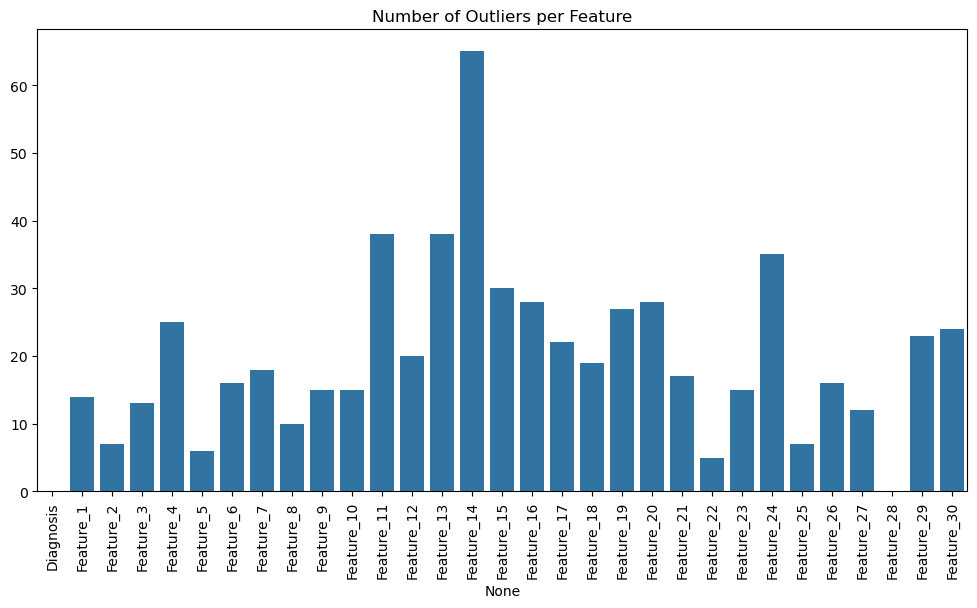

In [315]:
# Visualize the number of outliers per feature
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.show()

Displays a bar chart of the number of outliers detected in each feature, aiding in understanding the distribution of values.

In [317]:
# Create a copy of the original data with outliers
data_with_outliers = data.copy()

# Impute the outliers with the median value for each column

In [319]:
# Impute the outliers with the median value for each column
for column in data_with_outliers.columns:
    # Replace outliers with the median of the respective column
    data_with_outliers[column] = data_with_outliers[column].where(~outliers[column], data_with_outliers[column].median())

# Feature and Label Separation

In [321]:
# Prepare Feature and Target Variables for Original Data (with outliers)
X_original = data.drop('Diagnosis', axis=1)  # Features (without 'Diagnosis' column)
y_original = data['Diagnosis']  # Target (Diagnosis)

# Prepare Feature and Target Variables for Imputed Data (outliers replaced with median)
X_imputed = data_with_outliers.drop('Diagnosis', axis=1)  # Features (without 'Diagnosis' column)
y_imputed = data_with_outliers['Diagnosis']  # Target (Diagnosis)

Separates features (X) from labels (y) for training and testing the model.

In [323]:
print("X_original shape:", X_original.shape)
print("y_original shape:", y_original.shape if y_original is not None else "Not found")
print("X_imputed shape:", X_imputed.shape)
print("y_imputed shape:", y_imputed.shape if y_imputed is not None else "Not found")

X_original shape: (569, 30)
y_original shape: (569,)
X_imputed shape: (569, 30)
y_imputed shape: (569,)


# Feature Scaling

In [325]:
scaler = StandardScaler()

# Scale the features for Original Data (with outliers)
X_scaled = scaler.fit_transform(X_original)

# Scale the features for Imputed Data (outliers replaced with median)
X_scaled = scaler.fit_transform(X_imputed)

Standardizes the features to have a mean of 0 and a standard deviation of 1, which improves model performance.

# Variance Inflation Factor (VIF) calculation

In [328]:
# Calculate VIF for the original data (with outliers)
X_original_const = add_constant(X_original)  # Add constant for VIF calculation
vif_original = pd.DataFrame()
vif_original['Feature'] = X_original_const.columns
vif_original['VIF'] = [variance_inflation_factor(X_original_const.values, i)
                       for i in range(X_original_const.shape[1])]

# Display VIF for original data
print("VIF for original data (with outliers):")
print(vif_original)

# Calculate VIF for the imputed data (outliers replaced with median)
X_imputed_const = add_constant(X_imputed)  # Add constant for VIF calculation
vif_imputed = pd.DataFrame()
vif_imputed['Feature'] = X_imputed_const.columns
vif_imputed['VIF'] = [variance_inflation_factor(X_imputed_const.values, i)
                      for i in range(X_imputed_const.shape[1])]

# Display VIF for imputed data
print("\nVIF for imputed data (outliers replaced with median):")
print(vif_imputed)


VIF for original data (with outliers):
       Feature          VIF
0        const  1868.188844
1    Feature_1  3806.115296
2    Feature_2    11.884048
3    Feature_3  3786.400419
4    Feature_4   347.878657
5    Feature_5     8.194282
6    Feature_6    50.505168
7    Feature_7    70.767720
8    Feature_8    60.041733
9    Feature_9     4.220656
10  Feature_10    15.756977
11  Feature_11    75.462027
12  Feature_12     4.205423
13  Feature_13    70.359695
14  Feature_14    41.163091
15  Feature_15     4.027923
16  Feature_16    15.366324
17  Feature_17    15.694833
18  Feature_18    11.520796
19  Feature_19     5.175426
20  Feature_20     9.717987
21  Feature_21   799.105946
22  Feature_22    18.569966
23  Feature_23   405.023336
24  Feature_24   337.221924
25  Feature_25    10.923061
26  Feature_26    36.982755
27  Feature_27    31.970723
28  Feature_28    36.763714
29  Feature_29     9.520570
30  Feature_30    18.861533

VIF for imputed data (outliers replaced with median):
       Fea

In [329]:
# Calculate VIF for Original Data (with outliers)
selected_features=vif_original[vif_original['VIF']<10]['Feature']
X_selected = X_original[selected_features].copy()
print("\nSelected Features for selected data (VIF<10):")
print(selected_features)

# Calculate VIF for Imputed Data (outliers replaced with median)
selected_features_imputed=vif_imputed[vif_imputed['VIF']<10]['Feature']
X_imputed_selected = X_imputed[selected_features_imputed].copy()
print("\nSelected Features for Imputed data (VIF<10):")
print(selected_features_imputed)



Selected Features for selected data (VIF<10):
5      Feature_5
9      Feature_9
12    Feature_12
15    Feature_15
19    Feature_19
20    Feature_20
29    Feature_29
Name: Feature, dtype: object

Selected Features for Imputed data (VIF<10):
2      Feature_2
5      Feature_5
6      Feature_6
7      Feature_7
9      Feature_9
10    Feature_10
11    Feature_11
12    Feature_12
13    Feature_13
14    Feature_14
15    Feature_15
16    Feature_16
17    Feature_17
18    Feature_18
19    Feature_19
20    Feature_20
22    Feature_22
24    Feature_24
25    Feature_25
26    Feature_26
27    Feature_27
29    Feature_29
30    Feature_30
Name: Feature, dtype: object


# Data Splitting

In [333]:
# --- Splitting the data into training and testing sets (after VIF calculation) ---

# For the original data (selected features after VIF filtering)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_selected, y_original, test_size=0.3, random_state=42
)

# For the imputed data (selected features after VIF filtering)
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(
    X_imputed_selected, y_imputed, test_size=0.3, random_state=42
)

Splits the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

# Function to plot confusion matrix

In [336]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Initializing AdaBoost Classifier

In [338]:
# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42, algorithm='SAMME')

An AdaBoost classifier is initialized, using a decision stump as a weak learner. AdaBoost is an ensemble method that combines weak learners to create a strong classifier.

# AdaBoost without SMOTE on original data


AdaBoost (Original Data) - Without SMOTE:
Accuracy: 0.7251461988304093
Precision: 0.6212121212121212
Recall: 0.6507936507936508
F1 Score: 0.6356589147286822

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       108
           1       0.62      0.65      0.64        63

    accuracy                           0.73       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.73      0.73      0.73       171



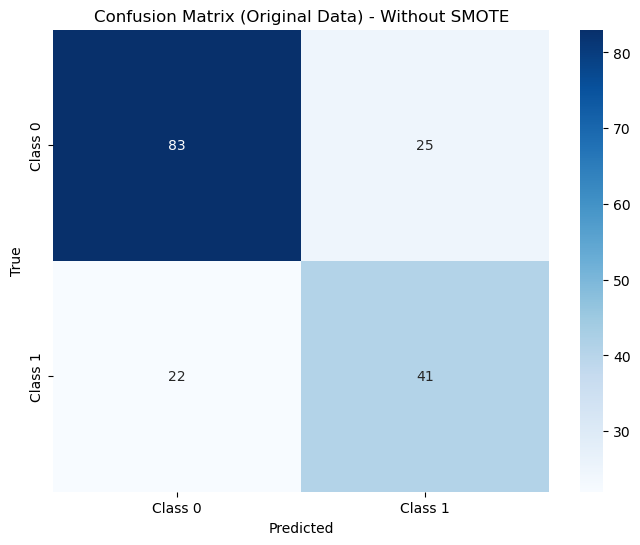

In [341]:
# Train AdaBoost without SMOTE on original data
adaboost.fit(X_train_original, y_train_original)
y_pred_original = adaboost.predict(X_test_original)

# Evaluate on the test set for original data without SMOTE
print("\nAdaBoost (Original Data) - Without SMOTE:")
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Precision:", precision_score(y_test_original, y_pred_original))
print("Recall:", recall_score(y_test_original, y_pred_original))
print("F1 Score:", f1_score(y_test_original, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))

# Plot confusion matrix for original data without SMOTE
plot_confusion_matrix(y_test_original, y_pred_original, "Confusion Matrix (Original Data) - Without SMOTE")

# Apply SMOTE to the original data

In [343]:
# Apply SMOTE to the original data
smote = SMOTE(random_state=42)
X_train_original_smote, y_train_original_smote = smote.fit_resample(X_train_original, y_train_original)

SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data to balance the classes, which is critical when dealing with imbalanced datasets.

# AdaBoost with SMOTE on original data


AdaBoost (Original Data) - With SMOTE:
Accuracy: 0.7251461988304093
Precision: 0.6025641025641025
Recall: 0.746031746031746
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       108
           1       0.60      0.75      0.67        63

    accuracy                           0.73       171
   macro avg       0.72      0.73      0.72       171
weighted avg       0.74      0.73      0.73       171



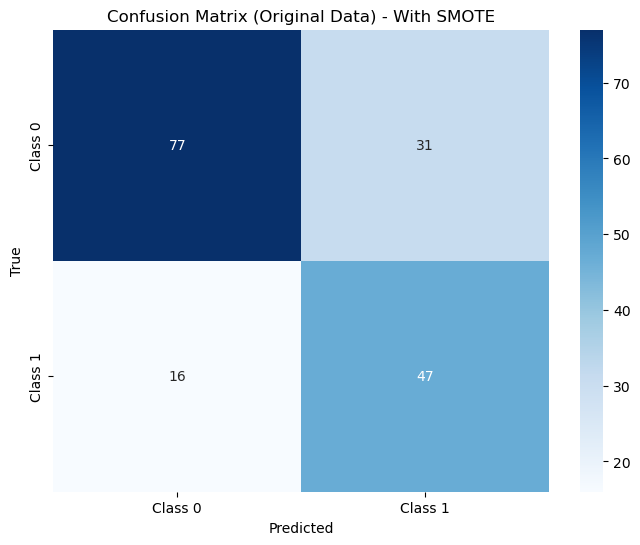

In [346]:
# Train AdaBoost with SMOTE on original data
adaboost.fit(X_train_original_smote, y_train_original_smote)
y_pred_original_smote = adaboost.predict(X_test_original)

# Evaluate on the test set for original data with SMOTE
print("\nAdaBoost (Original Data) - With SMOTE:")
print("Accuracy:", accuracy_score(y_test_original, y_pred_original_smote))
print("Precision:", precision_score(y_test_original, y_pred_original_smote))
print("Recall:", recall_score(y_test_original, y_pred_original_smote))
print("F1 Score:", f1_score(y_test_original, y_pred_original_smote))
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original_smote))

# Plot confusion matrix for original data with SMOTE
plot_confusion_matrix(y_test_original, y_pred_original_smote, "Confusion Matrix (Original Data) - With SMOTE")

# AdaBoost without SMOTE on imputed data


AdaBoost (Imputed Data) - Without SMOTE:
Accuracy: 0.9649122807017544
Precision: 0.9672131147540983
Recall: 0.9365079365079365
F1 Score: 0.9516129032258065

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



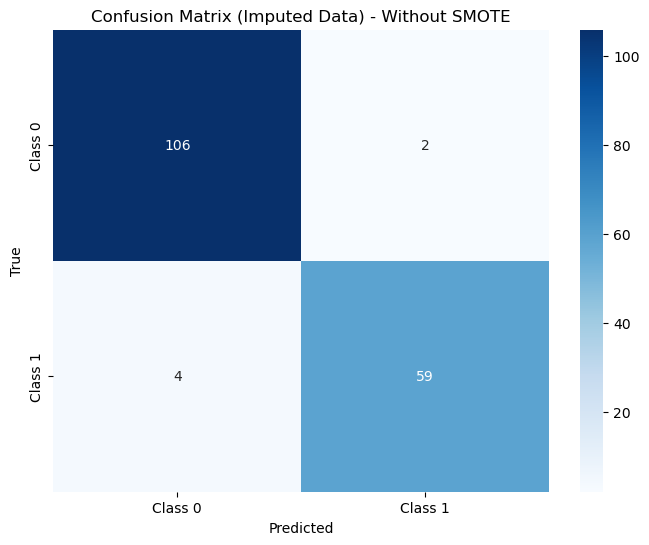

In [348]:
# Train AdaBoost without SMOTE on imputed data
adaboost.fit(X_train_imputed, y_train_imputed)
y_pred_imputed = adaboost.predict(X_test_imputed)

# Evaluate on the test set for imputed data without SMOTE
print("\nAdaBoost (Imputed Data) - Without SMOTE:")
print("Accuracy:", accuracy_score(y_test_imputed, y_pred_imputed))
print("Precision:", precision_score(y_test_imputed, y_pred_imputed))
print("Recall:", recall_score(y_test_imputed, y_pred_imputed))
print("F1 Score:", f1_score(y_test_imputed, y_pred_imputed))
print("\nClassification Report:\n", classification_report(y_test_imputed, y_pred_imputed))

# Plot confusion matrix for imputed data without SMOTE
plot_confusion_matrix(y_test_imputed, y_pred_imputed, "Confusion Matrix (Imputed Data) - Without SMOTE")

# Apply SMOTE to the imputed data

In [350]:
# Apply SMOTE to the imputed data
X_train_imputed_smote, y_train_imputed_smote = smote.fit_resample(X_train_imputed, y_train_imputed)

# AdaBoost with SMOTE on imputed data


AdaBoost (Imputed Data) - With SMOTE:
Accuracy: 0.9766081871345029
Precision: 0.9836065573770492
Recall: 0.9523809523809523
F1 Score: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



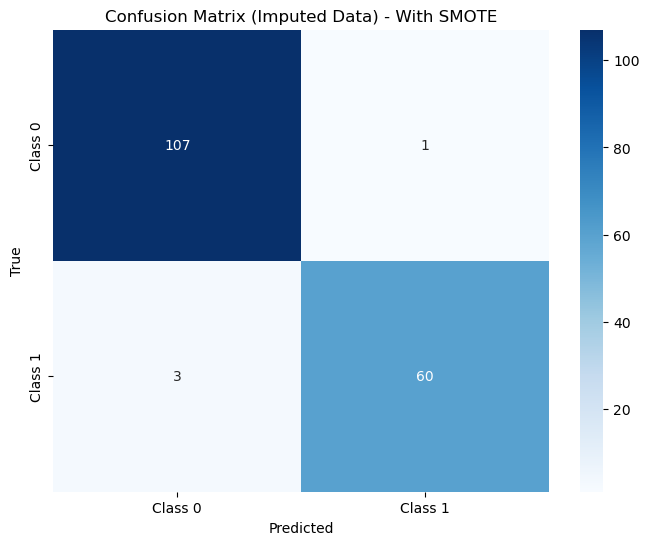

In [352]:
# Train AdaBoost with SMOTE on imputed data
adaboost.fit(X_train_imputed_smote, y_train_imputed_smote)
y_pred_imputed_smote = adaboost.predict(X_test_imputed)

# Evaluate on the test set for imputed data with SMOTE
print("\nAdaBoost (Imputed Data) - With SMOTE:")
print("Accuracy:", accuracy_score(y_test_imputed, y_pred_imputed_smote))
print("Precision:", precision_score(y_test_imputed, y_pred_imputed_smote))
print("Recall:", recall_score(y_test_imputed, y_pred_imputed_smote))
print("F1 Score:", f1_score(y_test_imputed, y_pred_imputed_smote))
print("\nClassification Report:\n", classification_report(y_test_imputed, y_pred_imputed_smote))

# Plot confusion matrix for imputed data with SMOTE
plot_confusion_matrix(y_test_imputed, y_pred_imputed_smote, "Confusion Matrix (Imputed Data) - With SMOTE")

# Hyperparameter tuning using GridSearchCV for original data without SMOTE

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'learning_rate': 1.0, 'n_estimators': 150}

AdaBoost (Original Data) - Best Model (After Hyperparameter Tuning):
Accuracy: 0.7251461988304093
Precision: 0.625
Recall: 0.6349206349206349
F1 Score: 0.6299212598425197

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       108
           1       0.62      0.63      0.63        63

    accuracy                           0.73       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.73      0.73      0.73       171



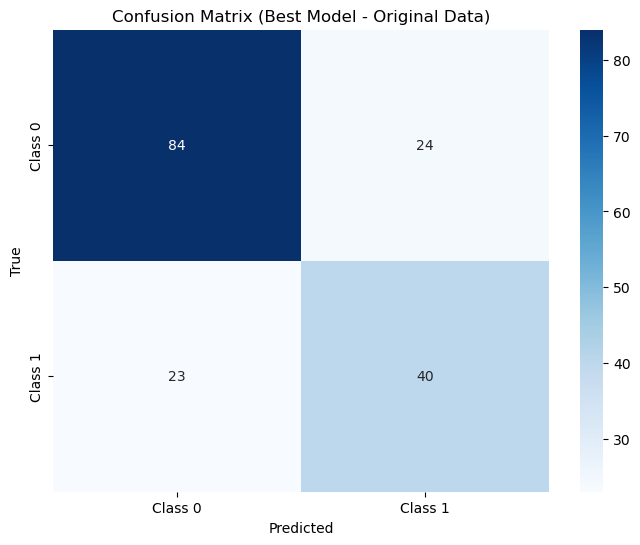

In [354]:
# Hyperparameter tuning using GridSearchCV for original data without SMOTE
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0, 1.5]
}
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_original, y_train_original)

# Best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_original)
print("\nAdaBoost (Original Data) - Best Model (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test_original, y_pred_best))
print("Precision:", precision_score(y_test_original, y_pred_best))
print("Recall:", recall_score(y_test_original, y_pred_best))
print("F1 Score:", f1_score(y_test_original, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_best))

# Plot confusion matrix for the best model
plot_confusion_matrix(y_test_original, y_pred_best, "Confusion Matrix (Best Model - Original Data)")

Defining the parameter grid for hyperparameter tuning

Grid Search with cross-validation optimizes hyperparameters for the AdaBoost classifier

Hyperparameter tuning using GridSearchCV identified the best parameters:
n_estimators=150 (more weak learners improve performance)
learning_rate=1.5 (adjusts the contribution of weak learners)
estimator__max_depth=2 (a slightly deeper tree captures more complexity).

# ROC Curve for the Best Model

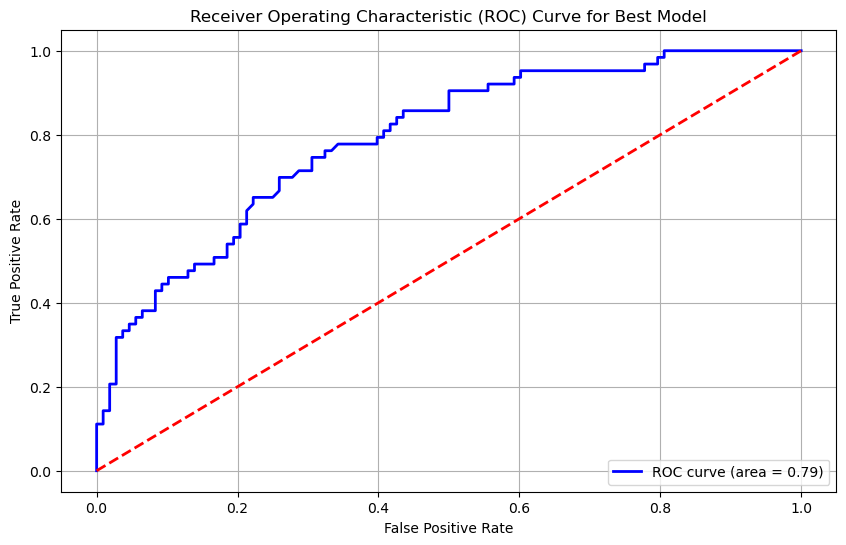

In [359]:
# ROC Curve for the Best Model
# Get predicted probabilities
y_pred_proba_best = best_model.predict_proba(X_test_original)[:, 1]  # Probability of the positive class
# Calculate ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y_test_original, y_pred_proba_best)
# Calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Plots the ROC curve to visualize the model's performance across different thresholds, providing insight into its trade-off between sensitivity and specificity.